# Pymaceuticals Inc.
---

### Analysis

- Drugs with more observations, such as Capomulin and Ramicane, have shown better retention rates. Which indicates efficiency/longer treatment durations. On the other hand, regimens with fewer observations might have led to higher dropout rates or less effectiveness in treatment.
- The goal of this analysis is to determine how many mouse timepoints were observed for each drug regimen. This helps identify the distribution of observations and may provide insights into the popularity or effectiveness of each drug in the study.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
study_results_complete.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [2]:
# Checking the number of mice.
num_mice = study_results_complete["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_results_complete.loc[study_results_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_ID = study_results_complete.loc[study_results_complete["Mouse ID"]== "g989"]
duplicate_mice_ID

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1  
1195           56.045564                 1  
1380           59.082294                 1  
1592           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropping_duplicate = study_results_complete[study_results_complete["Mouse ID"].isin(duplicate_mice) == False]
dropping_duplicate.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = dropping_duplicate["Mouse ID"].nunique()
num_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = study_results_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = study_results_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = study_results_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_tumor_volume = study_results_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = study_results_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev ": standard_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
}) 
summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev   Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.507770                0.512884  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = study_results_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var", "std", "sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_p = study_results_complete.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar",
                                                        title="Mouse Timepoints Observed Across Drug Regiments", ylabel="Count", color = "#FFA500")

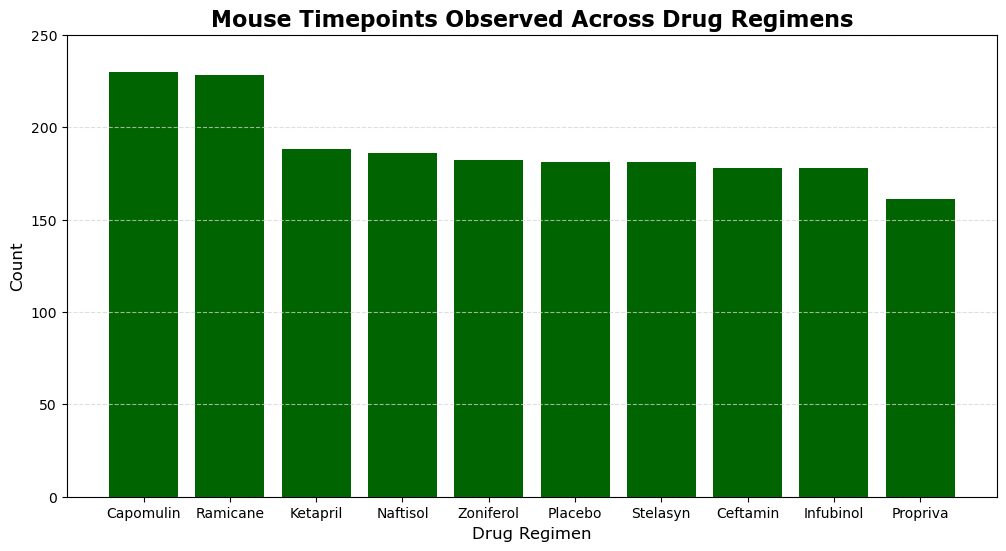

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Data Viz Recipe
data = study_results_complete.groupby("Drug Regimen").size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(data.index, data.values, color="darkgreen", align="center")

# Customizations

# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Verdana", fontsize=12)
plt.ylabel("Count", fontfamily="Verdana", fontsize=12)
plt.title("Mouse Timepoints Observed Across Drug Regimens", fontweight="bold", fontsize=16, fontfamily="Verdana")

# Set X/Y Limits
plt.ylim(0, 250)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [11]:
# Get the mouse data
dropping_duplicate.Sex.value_counts()

Sex
Male      958
Female    922
Name: count, dtype: int64

In [12]:
option1 = dropping_duplicate[["Mouse ID", "Sex"]].drop_duplicates()
option1.shape

(248, 2)

In [13]:
option2 = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989"].reset_index(drop=True)
option2.shape

(248, 5)

In [14]:
option1.Sex.value_counts()

Sex
Male      125
Female    123
Name: count, dtype: int64

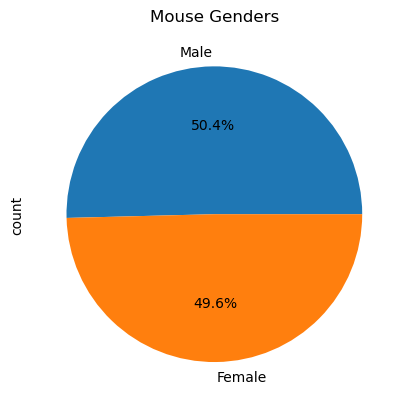

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
data = option1.Sex.value_counts()

# Make the pie chart
data.plot(kind="pie", title="Mouse Genders", autopct="%1.1f%%")
plt.show()

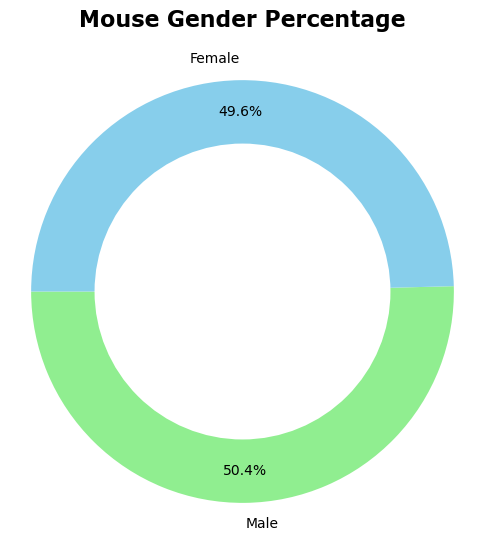

In [32]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
 # Data Viz Recipe
data = option1.Sex.value_counts()
    
# Change Canvas Size
plt.figure(figsize=(6, 6))
    
# Create a basic plot
plt.pie(data.values, labels=data.index,colors=["lightgreen", "skyblue"], autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)
    
# Customizations
# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)
    
# Change colors
# Add in reference lines
# Add Labels/Title
plt.title(f"Mouse Gender Percentage\n", fontweight="bold", fontsize=16, fontfamily="Verdana")
    
# Set X/Y Limits
plt.axis("equal")
    
# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = dropping_duplicate.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df = pd.merge(max_time, dropping_duplicate, on=["Mouse ID", "Timepoint"], how = "left")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df["Drug Regimen"].isin(drugs)
updated_df = df.loc[mask].reset_index(drop=True)
updated_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.999356                 3  
3            38.407618                 1  
4            43.047543                 0  
..                 ...               ...  
95           68.594745                 4  
96           31.896238                 2  
97           64.729837                 3  
98           30.638696                 0  
99           62.754451                 3  

[100 rows x 8 columns]

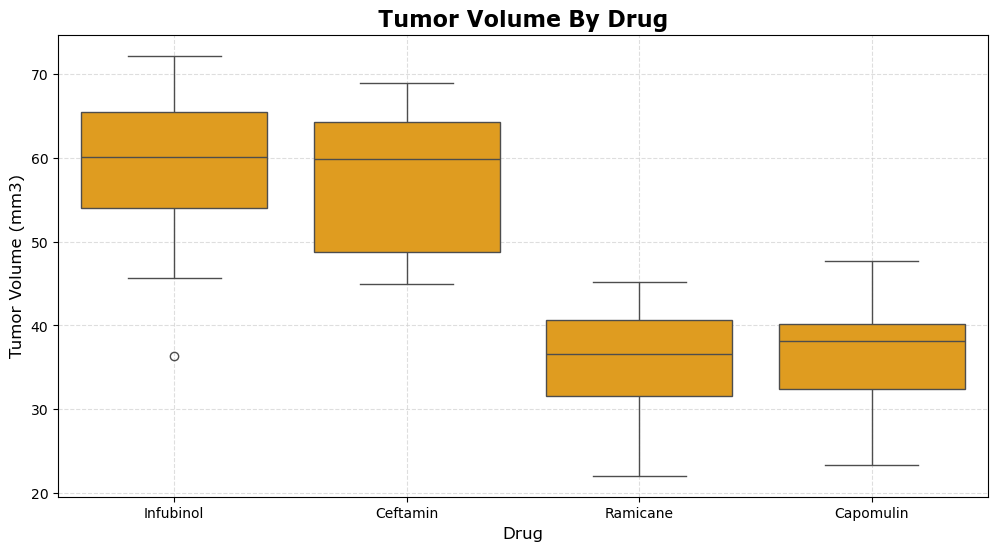

In [47]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=updated_df, y="Tumor Volume (mm3)", x="Drug Regimen", color="orange")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug", fontfamily="Verdana", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Verdana", fontsize=12)
plt.title("Tumor Volume By Drug", fontweight="bold", fontsize=16, fontfamily="Verdana")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = updated_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = updated_df.loc[updated_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Add subject
    tumor_volumes.append(treatment_data)
    
    # Calculate the IQR
    q1 = np.percentile(treatment_data, 25)
    q2 = np.percentile(treatment_data, 75)
    iqr = q2 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q2 + (1.5 * iqr)

    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")

Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


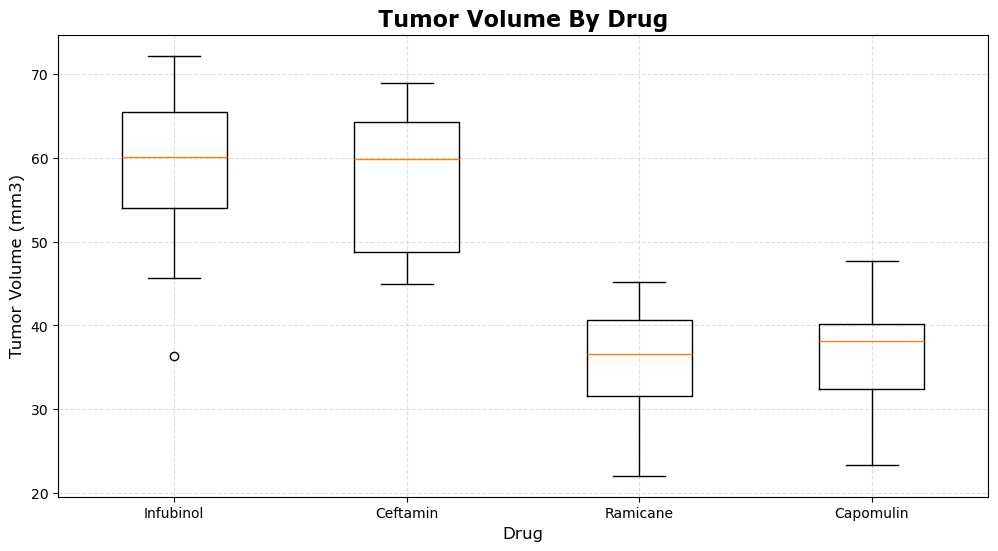

In [49]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 6))

plt.boxplot(tumor_volumes, tick_labels=treatments)

# Add Labels/Title
plt.xlabel("Drug", fontfamily="Verdana", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Verdana", fontsize=12)
plt.title("Tumor Volume By Drug", fontweight="bold", fontsize=16, fontfamily="Verdana")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)


plt.show()

## Line and Scatter Plots

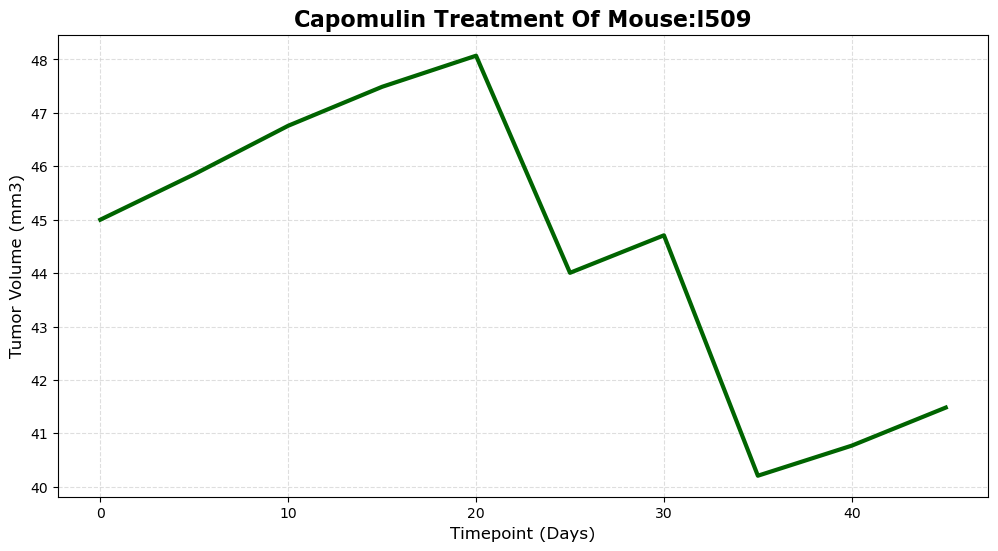

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"

mouse_id_df = dropping_duplicate.loc[dropping_duplicate["Mouse ID"] == mouse]

#df2.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df2.Timepoint, mouse_id_df["Tumor Volume (mm3)"], color="darkgreen", linewidth = 3)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint (Days)", fontfamily="Verdana", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Verdana", fontsize=12)
plt.title(f"Capomulin Treatment Of Mouse:{mouse}", fontweight="bold", fontsize=16, fontfamily="Verdana")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"
regimen_df = dropping_duplicate.loc[dropping_duplicate["Drug Regimen"] == regimen] 
avg_weight = regimen_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()
avg_weight.head()

Mouse ID  Tumor Volume (mm3)  Weight (g)
0     b128           41.963636        22.0
1     b742           40.083699        21.0
2     f966           36.505973        17.0
3     g288           41.990097        19.0
4     g316           44.613344        22.0

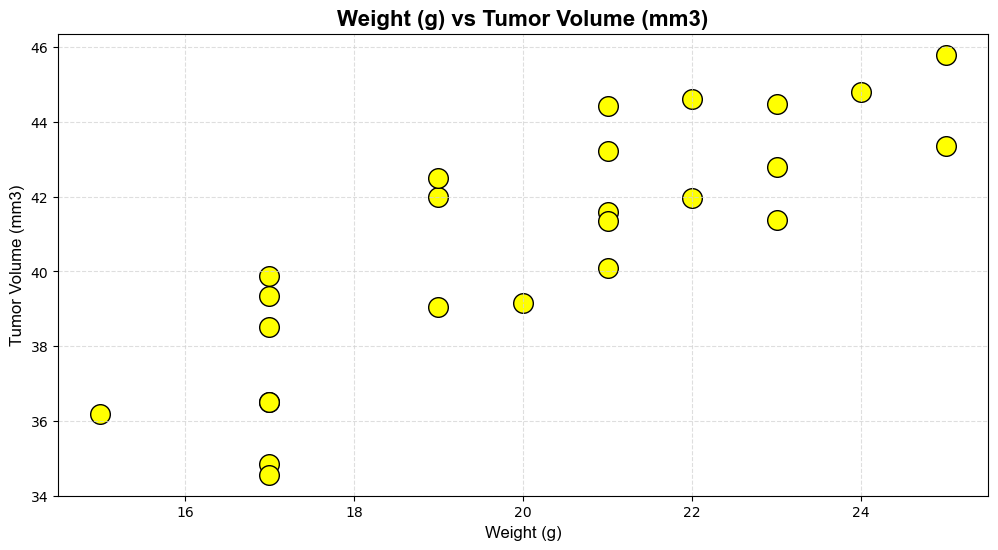

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"], color="yellow", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = avg_weight["Weight (g)"]
y_values = avg_weight["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


In [62]:
rvalue

0.8419363424694721

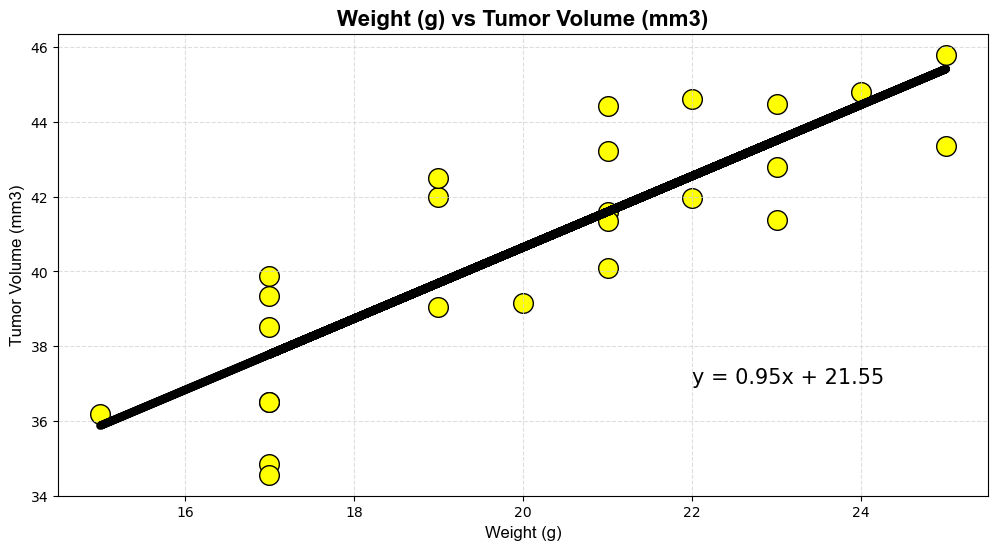

In [63]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(avg_weight["Weight (g)"], df4["Tumor Volume (mm3)"], color="yellow", edgecolor="black", s=200)
plt.plot(avg_weight["Weight (g)"], regress_values, color="black", linewidth=6) # the regression line

# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(line_eq, (22, 37), fontsize=15, color="black")

# Show/Save the Graph
plt.show()

In [55]:
# Correlations
corrs = df4.corr(numeric_only=True)
corrs

Tumor Volume (mm3)  Weight (g)
Tumor Volume (mm3)            1.000000    0.841936
Weight (g)                    0.841936    1.000000

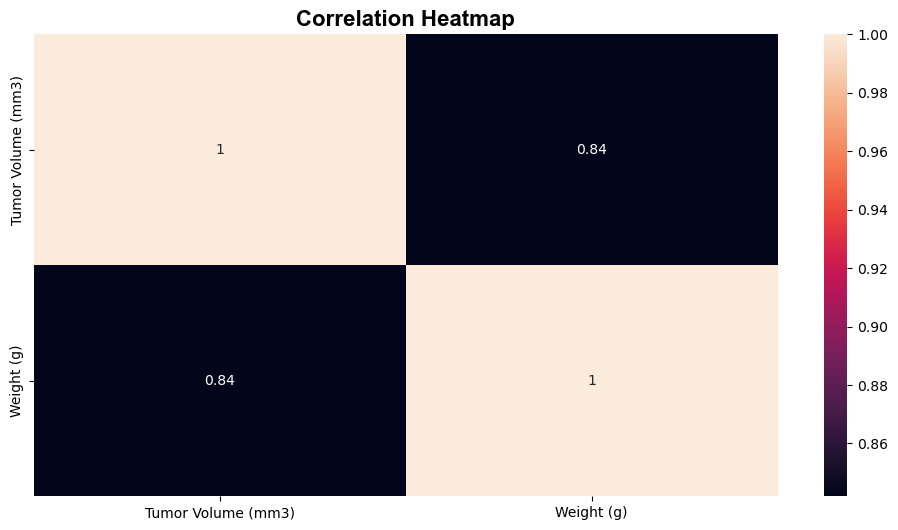

In [56]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.heatmap(corrs, annot=True)

# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()